<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <img src="https://upload.wikimedia.org/wikipedia/fa/thumb/f/fd/University_of_Tehran_logo.svg/1200px-University_of_Tehran_logo.svg.png" style="float:left;width:140px;padding-top: 10px" />
    <div style="font-size: 20px;padding-top: 30px;"><b>پروژه پنجم(فاز اول):   پیاده سازی و آموزش شبکه های عصبی FeedForward</b></div>
    <div style="font-size: 16px;margin-top: 20px;">ثمین مهدی زاده 810196623</div>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    در این پروژه در ابتدا یک شبکه عصبی FeedForward از پایه و به کمک کتابخانه ی Numpy پیاده سازی شده است.سپس شبکه عصبی پیاده سازی شده را به روی داده های Fashon Mnist آموزش داده ودر ادامه تاثیر هر یک از پارامتر ها در فرآیند یادگیری شبکه بررسی می شود.
    <br/>
    یک شبکه عصبی به این صورت عمل می کند که تعدادی ویژگی دریافت می کند و با ضرب ویژگی ها در وزن ها و جمع آن ها با یکدیگر اطلاعات را به نورون های لایه ی بعد انتقال می دهد.همچنین در هر کدام از این نورون ها ممکن است از یک activation استفاده شود.در نهایت نیز احتمال مربوط به هر دسته در لایه ی آخر به دست آمده و آن داده را به کلاسی که بیشترین احتمال را دارد نسبت میدهیم.
    <img src="img/1.png" style="align:center;width:55%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>مرحله اول: بررسی و پیش پردازش داده ها</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در این مرحله ابتدا داده های تست و آموزش به همراه کلاس آن ها خوانده می شود و برخی اطلاعات آن ها دیده می شود.
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
train_data = pd.read_csv('Fashion-MNIST/trainData.csv', header=None)
train_label = pd.read_csv('Fashion-MNIST/trainLabels.csv',header=None)

In [4]:
test_data = pd.read_csv('Fashion-MNIST/testData.csv', header=None)
test_label = pd.read_csv('Fashion-MNIST/testLabels.csv',header=None)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     اگر ویژگی های هر داده را در کنار برچسب آن قرار دهیم به داده ی زیر می رسیم که دارای 60000 سطر و 785 ستون است که ستون آخر بیانگر کلاس هر داده است.
</div>

In [5]:
train = pd.concat([train_data,train_label], axis=1)
train.columns = [i for i in range(0,785)]
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     اگر همین کار را برای داده های تست نیز انجام دهیم به داده ای می رسیم که دارای 1000 سطرو 785 ستون است.
</div>

In [6]:
test = pd.concat([test_data,test_label], axis=1)
test.columns = [i for i in range(0,785)]
test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     حال از میان داده های آموزش از هر کلاس یک داده انتخاب کرده، آن را در متغیر sample ذخیره کرده ودر قالب یک تصویر نشان می دهیم.
</div>

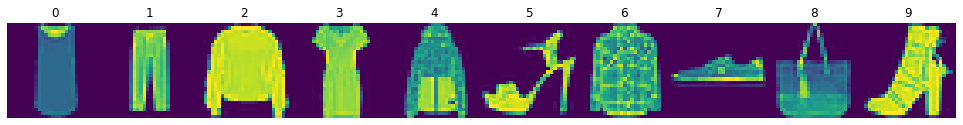

In [7]:
sample = pd.DataFrame(columns = train.columns)
for i in range(0,10):
    row = train[train[784]==i].iloc[1]
    sample.loc[i] = row

fig, axs = plt.subplots(1, 10,figsize=(17,17)) 
fig.subplots_adjust(wspace=0,hspace=0)
for i in range(10):
    arr = np.array(sample.drop(columns=784),dtype = float)[i]
    arr = np.reshape(arr, (28, 28))
    label = sample[784][i]
    axs[i].imshow(arr)
    axs[i].set_title(label)
    axs[i].axis('off')

plt.show()

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     دو شکل زیر فراوانی داده های هر کلاس را در میان داده های تست و آموزش نشان می دهد.مشاهده می شود که در هر دو داده ی تست و آموزش فراوانی کلاس ها یکسان است.
</div>

Text(0.5, 1.0, 'Train')

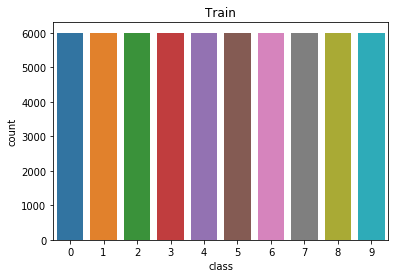

In [8]:
ax = sns.countplot(x = train[784])
ax.set(xlabel='class', ylabel='count')
ax.set_title("Train")

Text(0.5, 1.0, 'Test')

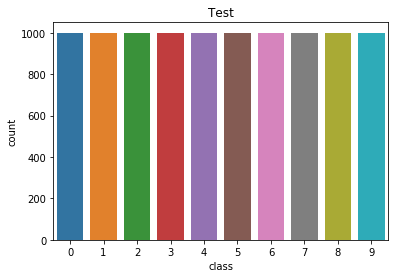

In [9]:
ax = sns.countplot(x = test[784])
ax.set(xlabel='class', ylabel='count')
ax.set_title("Test")

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در ادامه داده ها را با تقسیم هر کدام از ویژگی ها به 255 (با توجه به این که محدوده هر کدام از ویژگی ها بین 0  تا 255 است)نرمالایز کرده و در ادامه کار برای آموزش شبکه از این داده ها استفاده می کنیم.مزیت های انجام این کار
عبارت اند از:
    <li>ممکن است رنج برخی داده ها خیلی بزرگتر از داده های دیگر باشد و همین موضوع باعث می شود که این داده تاثیر بیشتری بر روی نتایج بگذارد برای مثال برای دو ویژگی سن و حقوق میدانیم رنج حقوق بسیار بزرگ تر از رنج سن است در صورتی که داده ها را نرمال نکنیم تاثیر حقوق بر یادگیری شبکه و تغییر وزن ها بیشتر است حال آن که اگر داده ها را نرمال کنیم دیگر با این مشکل روبه رو نخواهیم شد.</li>
    <li>در لایه های مختلف شبکه هر کدام از ورودی ها در وزن ها ضرب می شوند و درصورتی که ورودی ها خیلی بزرگ باشند حاصل ضرب آن ها منجر به overflow خواهد شد نرمال سازی با کمتر کردن رنج داده از این موضوع جلوگیری می کند.همچنین محاسبات داده های بزرگ زمان بر است و زمان اجرا را بالاتر می برد.</li>
</div>

In [10]:
test_normalize = test_data/255
train_normalize = train_data/255

In [11]:
train_normalize

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [12]:
test_normalize

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>مرحله دوم: تکمیل بخش های ناقص شبکه ی عصبی</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در این مرحله کد های ناقص تکمیل شده است که در ادامه راجع به هر یک به طور مختصر توضیح داده شده است.
</div>

# Dataloader

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در این کلاس دوتابع onehot و shuffle_dataset کامل شده است:
    <li><b>onehot</b></li>
     این تابع تعداد کل کلاس ها و برچسب ها را دریافت می کند و آن ها  را به کمک تابع eye کد می کند.این تابع به این صورت عمل می کند که به ازای هر برچسب آرایه ای به سایز کل کلاس به وجود می آورد و همه ی عناصر آرایه را به برابر 0 قرار می دهد به جز عنصری که ایندکس آن برابر برچسب است.(مقدار این عنصر را برابر یک در نظر می گیرد)
    <li><b>shuffle_dataset</b></li>
    شافل کردن دیتا در برخی موارد می تواند به فرآیند آموزش کمک کند چرا که ممکن است دیتاست به گونه ای باشد که داده های شبیه به هم نزدیک یکدیگر قرارداشته باشند و این موضوع باعث می شود که یادگیری به خصوص در مواقعی که از  batch استفاده می کنیم به خوبی صورت نگیرد چرا که داده های ورودی تاحد زیادی شبیه به هم هستند.این تابع به کمک permutation ایندکس ها را جابه جا می کند و ترتیب داده ی موجود را به هم میریزد.
    
</div>

In [13]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # TODO: Implement
        onehot_vectors = np.eye(n_classes)[labels]
        onehot_vectors = np.matrix(onehot_vectors)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        # TODO: Implement
        train_data = np.matrix(self.__data)
        train_label = np.matrix(self.__onehot_labels)
        idx = np.random.permutation(len(train_data))
        self.__data,self.__onehot_labels = train_data[idx],train_label[idx]
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     این بخش به پیاده سازی توابع فعال ساز جهت استفاده از آن ها در لایه ها ی شبکه می پردازد.هر کلاس خروجی تابع فعال ساز(جهت استفاده در مرحله forward)  و مشتق تابع فعال ساز نسبت به ورودی را (جهت استفاده در back propagation) محاسبه می کند.
    <br/>
    <img src="img/2.png" style="align:center;width:50%;padding-top: 10px" />
</div>

In [14]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        # TODO: Implement
        relu_value = np.matrix(matrix, dtype=float)
        relu_value[relu_value<0] = 0
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative>=0] = 1
        relu_derivative[relu_derivative<0] = 0 
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp < 0,self.negative_slope*temp, temp))
        return leacky_relu_value

    def derivative(self, matrix):
        # TODO: Implement
        leacky_relu_derivative = np.matrix(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative>=0] = 1
        leacky_relu_derivative[leacky_relu_derivative<0] = self.negative_slope
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1+np.exp(-temp))
        return sigmoid_value

    def derivative(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply(self.__val(temp),(1-self.__val(temp)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        tanh_value = (2/(1+np.exp(-2*temp)))-1
        return tanh_value

    def derivative(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1-np.multiply(self.__val(matrix),self.__val(matrix))
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        matrix = np.matrix(matrix, dtype=float)
        for i in range(len(matrix)):
            z = matrix[i]
            z = z-np.max(z)
            e_z = np.exp(z)
            matrix[i] = e_z/np.sum(e_z)
        softmax_value = np.matrix(matrix)
        return softmax_value

    def derivative(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        softmax_derivative = np.multiply(self.__val(temp),(1-self.__val(temp)))
        return softmax_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     این کلاس جهت محاسبه ی مقدار loss بر روی داده ها زده شده است. هم چنین جهت به روز رسانی وزن ها به مشتق loss در هر لایه احتیاج داریم. جهت ساده شدن مشتق، از تابع فعال ساز SoftMax در درون این تابع استفاده می شود
    <br/>
    <img src="img/3.png" style="align:center;width:50%;padding-top: 10px" />
    <br/>
    loss نسبت به هر خروجی به صورت زیر محاسبه می شود:
    <img src="img/4.png" style="align:center;width:40%;padding-top: 10px" />
    loss  کلی برروی یک مجموعه داده از مجموع loss هر خروجی به دست می آید بنابراین داریم:
    <img src="img/5.png" style="align:center;width:40%;padding-top: 10px" />
      درانتها نیز مشتق loss نسبت به خروجی مطابق شکل زیر به دست می آید.
    <img src="img/6.png" style="align:center;width:50%;padding-top: 10px" />
</div>

In [15]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        softmax = Softmax()
        softmax = softmax(true_val)
        a = -np.matrix(expected_val)
        b = np.log(softmax)
        li = np.multiply(a,b)
        cross_entropy_value = np.sum(li,axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        softmax = Softmax()
        softmax = softmax(true_val)
        cross_entropy_derivative = softmax - np.matrix(expected_val)
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     این کلاس یک لایه از شبکه عصبی را نشان می دهد.با کنارهم قرار دادن این لایه ها شبکه عصبی به وجود می آید.ورودی هر لایه به اندازه تعداد ورودی هایی است که از لایه ی قبل به آن رسیده است و تعداد خروجی های آن برابر تعداد نورون های لایه است.هر لایه شامل وزن هایی است که در ابتدا می توانند توسط توابع uniform و  normalمقدار دهی اولیه شوند.همچنین توابع لازم جهت محاسبه ی خروجی لایه و به روزرسانی وزن ها کامل شده است که در ادامه به طور مختصر راجع به آن ها توضیح داده خواهد شد.
    <li><b>مقدار دهی اولیه وزن ها</b></li>
    مقدار دهی اولیه وزن ها تاثیر زیادی بر یادگیری شبکه دارد.در صورتی که وزن ها بسیار بزرگ انتخاب شود خروجی شبکه بزرگ می شود و هنگام back propagation گرادیان بزرگ می شود و باعث می شود وزن ها نوسان زیادی داشته باشند(gradient exploding). همچنین در صورتی که وزن ها بسیار کوچک باشند خروجی شبکه نیز بسیار کوچک می شود و هنگام بازگشت و به روز رسانی وزن ها،وزن ها عملا تغییری نمی کنند(خیلی جزئی) و فرآیند یادگیری انجام نمی شود(gradiant vanish)بنابراین وزن های بسیار بزرگ باعث واگرا شدن شبکه و انتخاب وزن های کوچک باعث کند شدن آموزش می شود.
     <br/>
    جهت جلوگیری از این اتفاق باید از توزیعی استفاده شود میانگین خروجی لایه صفر باشد به این منظور که وروری های لایه بعد داده های خیلی بزرگ یا کوچک نباشند بلکه پخش شده باشند و همچنین واریانس خروجی ها در طول داده ها ثابت بماند و به گونه ای نباشد که در یک لایه وزن ها مناسب باشند ولی در لایه های بعد این وزن ها دچار تغییرات زیادی شوند.به این منظور جهت مقدار دهی اولیه به وزن ها بهتر است از توزیع نورمال با میانگین 0  و واریانس برابر 1تقسیم بر n استفاده شود که در آن n بیانگر تعداد ورودی های لایه است.
    <li><b>forward</b></li>
    در این تابع 4 مقدار جهت استفاده از آن ها در فرآیند به روز رسانی ذخیره می شود:
    <br/>
    <li>last_input</li>
    .این مقدار برابر با همان ورودی لایه است
    <li>last_activation_input</li>
    ورودی تابع فعال ساز که از حاصل ضرب ویژگی ها در وزن ها و مجموع آن با بایاس به دست می آید.
    <li>last_activation_output</li>
    اعمال تابع فعال ساز به ورودی قسمت بالا و به دست آوردن خروجی نورون لایه.
    <li>last_activation_derivative</li>
    به دست آوردن مشتق خروجی لایه نسبت به ورودی جهت استفاده از آن در عملیات back propagation
    <li><b>update_weights</b></li>
    هنگامی که به لایه ی آخر شبکه می رسیم لازم است جهت به روز رسانی وزن و بایاس ها لایه به لایه به عقب برگردیم و وزن ها را آپدیت کنیم.این تابع پس از به روز رسانی وزن ها و بایاس جهت محاسبه شدن وزن ها ی جدید توسط لایه ی قبلی مشتق loss نسبت به خروجی لایه ی قبل خود را نیز بر می گرداند که برابر همان مشتق لاس نسبت به ورودی خودش است.
    <br/>
    وزن و بایاس مطابق روابط زیر آپدیت می شوند:
    <img src="img/7.png" style="width:20%;padding-top: 10px" />
    در ادامه به کمک یک مثال این مشتق ها محاسبه می شوند.در این مثال سایز batch برابر1،تعداد ورودی برابر 2 و تعداد خروجی ها برابر 3 در نظر گرفته شده است.
    <img src="img/8.png" style="float:left;width:50%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
مشتق loss نسبت به ورودی مطابق روابط زیر محاسبه می شود.
    <img src="img/9.png" style="float:left;width:70%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   اگر همین روابط را برای  وزن نیز بنویسیم داریم:
   <img src="img/10.png" style="float:left;width:60%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   با نوشتن مشتق loss برای همه ی وزن ها داریم:
    <img src="img/11.png" style="float:left;width:60%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   در نهایت برای بایاس داریم:
    <img src="img/12.png" style="float:left;width:60%;padding-top: 10px" />
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   که ماتریس تمام یک دارای یک سطر است و به تعداد batch ستون دارد.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   جهت به روز رسانی وزن ها در هر لایه از شبکه مطابق فرمول های زیر هر لایه داده ها را به لایه ی قبل از خود منتقل می کند.i  در فرمول های زیر بیانگر شماره لایه است.
    <img src="img/13.png" style="float:left;width:35%;padding-top: 10px" />
</div>

In [16]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def get_layer_output(self):
        return self.__last_activation_output
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
        batch_size = np.size(layer_input,0)
        self.__last_input = np.matrix(layer_input)
        self.__last_activation_input = np.matmul(self.__last_input,self.__weight)+ self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement
        batch_size = np.size(self.__last_input,0)
        x_transpose = np.transpose(self.__last_input)
        w_transpose = np.transpose(self.__weight)
        bias_matrix_multiply = np.matrix([1 for i in range(0,batch_size)])
        dotMatrix = np.multiply(backprop_tensor,self.__last_activation_derivative)
        self.__weight = self.__weight - lr * np.matmul(x_transpose,dotMatrix)
        self.__bias = self.__bias - lr * np.matmul(bias_matrix_multiply,dotMatrix)
        backprop_tensor = np.matmul(dotMatrix,w_transpose)
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        temp = np.random.uniform(low=low, high=high, size=(dim1,dim2))
        weights = np.matrix(temp)
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        temp = np.random.normal(mean,np.sqrt(var),size=(dim1,dim2))
        weights = np.matrix(temp)
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
   این کلاس در بر گیرنده ی شبکه ی کلی است. همه ی لایه ها را کنار هم قرار می دهد،شبکه را آموزش می دهد، خروجی نهایی را محاسبه می کند و کلاس هر داده را به دست می آورد.در نهایت نیز با مقایسه ی نتایج عملکرد شبکه را می سنجد و در صورت نیاز از لایه ی آخر تا لایه ی نخست وزن ها را آپدیت می کند.
    <li>forward</li>
     این تابع با گرفتن ورودی شبکه روی تمامی لایه ها حرکت کرده و خروجی آن ها را حساب می کند سپس خروجی به دست آمده را به عنوان ورودی به لایه ی بعد می دهد تا در انتها خروجی نهایی شبکه محاسبه شود.
    <li>update_weights</li>
     این تابع خروجی تولید شده توسط شبکه و پاسخ های صحیح آن ها را میگیرد و مشتق loss بر روی خروجی های لایه ی آخر را محاسبه می کند.سپس لایه به لایه به عقب رفته و مطابق روابط گفته شده در قسمت قبل و به کمک تابع update_weights وزن های هر لایه را آپدیت می کند.
     <li>get_labels</li>
 در این تابع خروجی لایه ی آخر گرفته می شود و خروجی که بیشترین احتمال برای آن محاسبه شده است به عنوان کلاس داده های ورودی مشخص می شود.
    <li>compute_accuracy</li>
     این تابع مقادیر پیش بینی شده توسط شبکه و مقادیر درست را می گیرد و محاسبه می کند که چه تعداد از پاسخ ها به نسبت کل جواب ها مطابق با پاسخ درست بوده است.
    <li>train_on_batch</li>
    ابتداbatch  ای از داده ها به این تابع داده می شود و خروجی شبکه به ازای آن محاسبه می شود سپس به کمک تابع compute_accuracy میزان درستی جواب ها به دست می آید.همچنین میانگین loss به دست آمده  بر روی batch جهت بررسی عملکرد شبکه محاسبه می شود. در انتها نیز مطابق با loss به دست آمده ضرایب موجود در شبکه آپدیت می شود.
    <li>test_on_batch</li>
    این تابع نیز همانند تابع بالا عمل می کند با این تفاوت که چون تست انجام می شود دیگر وزن ها به روز رسانی نمی شوند.
   
    
</div>

In [17]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons,n_neurons,activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
        
    def get_layer_output(self,layer_num):
        return self.__layers_list[layer_num-1].get_layer_output()
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        layer_in = np.matrix(network_input)
        for layer in self.__layers_list:
            layer_out = layer.forward(layer_in)
            layer_in = layer_out
        network_output = layer_in
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(output,y_batch)
        loss = self.__loss(output,y_batch)
        batch_average_loss = np.mean(loss)
        self.__update_weights(output, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(output,y_batch)
        loss = self.__loss(output,y_batch)
        batch_average_loss = np.mean(loss)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        # TODO: Implement
        #return array
        labels = np.argmax(np.array(outputs), axis=1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        # TODO: Implement
        predicted_labels = self.__get_labels(output)
        expected_labels = self.__get_labels(expected_output)
        true_count = 0
        for i in range(0,len(predicted_labels)):
            if(predicted_labels[i] == expected_labels[i]):
                true_count+=1
        accuracy = true_count / len(predicted_labels)       
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        # TODO: Implement
        backprop_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backprop_tensor = layer.update_weights(backprop_tensor, self.__lr)
        return

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>مرحله سوم: طبقه بندی داده ها</b>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
     در این بخش شبکه عصبی پیاده سازی شده را توسط داده ها آموزش داده و تاثیر پارامتر های مختلف بر روی شبکه بررسی می شود.
</div>

# #3-1

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
     در ابتدا در گام اول شبکه عصبی با دو لایه پنهان به وجود آورده و مقادیر را مطابق جدول زیر قرار می دهیم:
    <img src="img/14.png" style="width:60%;padding-top: 10px" />
    مقدار learning_rate برابر 0.0001 در نظر گرفته شده که توسط آن دقت مناسبی از شبکه دریافت می شود.
</div>

In [17]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = Relu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = Relu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.52485	Average Loss: 1.3420877764238937
	Test: Average Accuracy: 0.6628394568690096	Average Loss: 0.8748398839982306
Epoch 2:
	Train: Average Accuracy: 0.7174	Average Loss: 0.7517443479609979
	Test: Average Accuracy: 0.7416134185303515	Average Loss: 0.6981935231072051
Epoch 3:
	Train: Average Accuracy: 0.7806833333333333	Average Loss: 0.6252063053302191
	Test: Average Accuracy: 0.7878394568690096	Average Loss: 0.6024077834182682
Epoch 4:
	Train: Average Accuracy: 0.80685	Average Loss: 0.5614339097522146
	Test: Average Accuracy: 0.7986222044728435	Average Loss: 0.5643491150518533
Epoch 5:
	Train: Average Accuracy: 0.8176833333333333	Average Loss: 0.526424989766248
	Test: Average Accuracy: 0.8101038338658147	Average Loss: 0.542410046465173
Epoch 6:
	Train: Average Accuracy: 0.8237833333333333	Average Loss: 0.5038790501423792
	Test: Average Accuracy: 0.8171924920127795	Average Loss: 0.5191276534410187
Epoch 7:
	Train: Average Accuracy: 0.8293	Average Lo

# #3-2

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
      در ادامه شبکه با leaning rate برابر با 0.001 و 0.00001 تست می شود و تاثیر این پارامتر بر روی شبکه بررسی می شود.
</div>

In [18]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = Relu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = Relu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.7430833333333333	Average Loss: 0.714568469326259
	Test: Average Accuracy: 0.8118011182108626	Average Loss: 0.5331714090807315
Epoch 2:
	Train: Average Accuracy: 0.8218666666666666	Average Loss: 0.5075904565070926
	Test: Average Accuracy: 0.8229832268370607	Average Loss: 0.49905157285097934
Epoch 3:
	Train: Average Accuracy: 0.8322833333333334	Average Loss: 0.47806916032815533
	Test: Average Accuracy: 0.818091054313099	Average Loss: 0.5035240151594743
Epoch 4:
	Train: Average Accuracy: 0.8401666666666666	Average Loss: 0.4588226399865374
	Test: Average Accuracy: 0.8304712460063898	Average Loss: 0.48882065352168813
Epoch 5:
	Train: Average Accuracy: 0.8443333333333334	Average Loss: 0.4449490141364131
	Test: Average Accuracy: 0.8343650159744409	Average Loss: 0.47678674299172474
Epoch 6:
	Train: Average Accuracy: 0.8471	Average Loss: 0.4383128499632826
	Test: Average Accuracy: 0.8295726837060703	Average Loss: 0.47499067889143104
Epoch 7:
	Train: Average 

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in matmul
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in matmul
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in matmul
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in matmul
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in matmul
/Users/mac/opt/a

	Train: Average Accuracy: 0.4236666666666667	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 16:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.10013977635782748	Average Loss: nan
Epoch 17:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.10013977635782748	Average Loss: nan
Epoch 18:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 19:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 20:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 21:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 22:
	Train: Average Accuracy: 0.1	Average Loss: nan
	Test: Average Accuracy: 0.09994009584664537	Average Loss: nan
Epoch 23:
	Train: Average A

In [19]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-5
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = Relu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = Relu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.2671	Average Loss: 2.206814530119577
	Test: Average Accuracy: 0.36551517571884984	Average Loss: 2.109203446874091
Epoch 2:
	Train: Average Accuracy: 0.44055	Average Loss: 1.923730337268526
	Test: Average Accuracy: 0.4967052715654952	Average Loss: 1.69735848468424
Epoch 3:
	Train: Average Accuracy: 0.5446666666666666	Average Loss: 1.4406527459559566
	Test: Average Accuracy: 0.5676916932907349	Average Loss: 1.2586972598126531
Epoch 4:
	Train: Average Accuracy: 0.58625	Average Loss: 1.1617273845686624
	Test: Average Accuracy: 0.5905551118210862	Average Loss: 1.1015666602017715
Epoch 5:
	Train: Average Accuracy: 0.6088	Average Loss: 1.0530449933524086
	Test: Average Accuracy: 0.6105231629392971	Average Loss: 1.0260429789615615
Epoch 6:
	Train: Average Accuracy: 0.6277833333333334	Average Loss: 0.9929436602602488
	Test: Average Accuracy: 0.6275958466453674	Average Loss: 0.9768538828096911
Epoch 7:
	Train: Average Accuracy: 0.6465	Average Loss: 0.95018523

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
  همان طور که مشاهده می شود در learning_rate برابر با 0.001 شبکه دچار overflow می شود و اگر learning_rate برابر 0.00001 باشد فرآیند یادگیری کند تر است و به دقت پایین تری دست می یایبم.
    <br/>
     در صورتی که learning_rate کوچک باشد ضرایب به کندی تغییر می کند وبه همین علت فرآیند یادگیری به طول می انجامد و اگر learning_rate بزرگ باشد ممکن است شبکه واگرا شود و هیچ وقت به ضرایب خوب جهت آموزش نرسد.
    <img src="img/15.png" style="width:60%;padding-top: 10px" />
</div>

# #3-3

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
در این بخش عملکرد شبکه به کمک توابع فعال ساز Leaky Relu,Tanh وSigmoid تست شده است.
</div>

In [20]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = LeakyRelu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = LeakyRelu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5645166666666667	Average Loss: 1.3355114775198886
	Test: Average Accuracy: 0.6919928115015974	Average Loss: 0.8403481522423342
Epoch 2:
	Train: Average Accuracy: 0.7335666666666667	Average Loss: 0.7396055884793888
	Test: Average Accuracy: 0.7590854632587859	Average Loss: 0.6810758233607558
Epoch 3:
	Train: Average Accuracy: 0.7790166666666667	Average Loss: 0.6263015828321052
	Test: Average Accuracy: 0.7765575079872205	Average Loss: 0.6110203974336057
Epoch 4:
	Train: Average Accuracy: 0.8004833333333333	Average Loss: 0.5671251247679611
	Test: Average Accuracy: 0.7966253993610224	Average Loss: 0.5683626321948941
Epoch 5:
	Train: Average Accuracy: 0.8129333333333333	Average Loss: 0.532415662306034
	Test: Average Accuracy: 0.8108027156549521	Average Loss: 0.5357288242639968
Epoch 6:
	Train: Average Accuracy: 0.8216333333333333	Average Loss: 0.5087674852048136
	Test: Average Accuracy: 0.8090055910543131	Average Loss: 0.5354422746810543
Epoch 7:
	Train: 

In [21]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = Sigmoid(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = Sigmoid(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.16316666666666665	Average Loss: 2.2949113808869868
	Test: Average Accuracy: 0.25139776357827476	Average Loss: 2.289240205405354
Epoch 2:
	Train: Average Accuracy: 0.24913333333333335	Average Loss: 2.2822377397044677
	Test: Average Accuracy: 0.3121006389776358	Average Loss: 2.273940114462208
Epoch 3:
	Train: Average Accuracy: 0.3309666666666667	Average Loss: 2.2541833828916094
	Test: Average Accuracy: 0.38168929712460065	Average Loss: 2.2244081582727095
Epoch 4:
	Train: Average Accuracy: 0.39721666666666666	Average Loss: 2.174657067576702
	Test: Average Accuracy: 0.41773162939297126	Average Loss: 2.108866710858867
Epoch 5:
	Train: Average Accuracy: 0.44216666666666665	Average Loss: 2.0197497849051995
	Test: Average Accuracy: 0.43520367412140576	Average Loss: 1.925100672614716
Epoch 6:
	Train: Average Accuracy: 0.43746666666666667	Average Loss: 1.842769732603311
	Test: Average Accuracy: 0.4549720447284345	Average Loss: 1.771379747792701
Epoch 7:
	Trai

In [22]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = Tanh(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = Tanh(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5646833333333333	Average Loss: 1.4506882511555375
	Test: Average Accuracy: 0.6788138977635783	Average Loss: 1.1003333937425566
Epoch 2:
	Train: Average Accuracy: 0.7106333333333333	Average Loss: 0.934006067945954
	Test: Average Accuracy: 0.7255391373801917	Average Loss: 0.8351317816785369
Epoch 3:
	Train: Average Accuracy: 0.7485166666666667	Average Loss: 0.7553392037647073
	Test: Average Accuracy: 0.7516972843450479	Average Loss: 0.725134946944233
Epoch 4:
	Train: Average Accuracy: 0.7708166666666667	Average Loss: 0.6730895288506251
	Test: Average Accuracy: 0.7690694888178914	Average Loss: 0.664116668732254
Epoch 5:
	Train: Average Accuracy: 0.7845833333333333	Average Loss: 0.6217605852983435
	Test: Average Accuracy: 0.7798522364217252	Average Loss: 0.6241464916172385
Epoch 6:
	Train: Average Accuracy: 0.79715	Average Loss: 0.5861339901172146
	Test: Average Accuracy: 0.792132587859425	Average Loss: 0.5949578237467168
Epoch 7:
	Train: Average Accura

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
نتایج به دست آمده نشان می دهد تابع Sigmoid به دقت بسیار پایینی رسیده است اما توابع Leaky Relu و Tanh به دقت مناسبی رسیده اند و نتایج نزدیک به هم دارند.
    <br/>
    مشکلی که در Relu وجود دارد این است که برای داده های منفی مقدار آن برابر 0 است. در صورتی که وزن ها در شبکه طوری تغییر کنند که کم کم مقادیر به سمت منفی بروند خروجی این تابع مقدار 0 بر میگرداند و گرادیان حاصل از این مقدار نیز برابر 0 است که این موضوع باعث می شود ضرایب دیگر به روز رسانی نشوند  و عمل یادگیری عملا متوقف می شود. در صورتی که در Leaky Relu ضریب کوچکی نیز در مقادیر منفی ضرب می شود تا از این موضوع جلوگیری شود و در صورتی که ورودی به تابع منفی منفی بود تاثیر آن به کلی از بین نرود.
    <br/>
بازه ی خروجی تابعSigmoid  بین 0 تا 1 و بازه ی خروجی تابع Tanh بین -1 تا 1 است.هر دوی این بازه ها بازه های کوچکی هستند که باعث می شود هنگامی که در مرحله ی back progation جهت به روز رسانی وزن ها مقادیر را ضرب کنیم به اعداد کوچکی برسیم( شیب توابع در دو سر به سمت 0 میل می کند) که تغییر زیادی در وزن ها ایجاد نمی کند و کم کم باعث ناپدید شدن گرادیان و کند شدن آموزش شبکه می شود. 

</div>

# #3-4

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
در این گام تاثیر سایز batch مورد بررسی قرار می گیرد.به این منظور شبکه با دو سایز 16 و 128 آموزش داده می شود.
</div>

In [23]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=16, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=16, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = LeakyRelu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = LeakyRelu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.4968666666666667	Average Loss: 1.4910366068777914
	Test: Average Accuracy: 0.678	Average Loss: 0.8841069025808727
Epoch 2:
	Train: Average Accuracy: 0.72165	Average Loss: 0.7801509279181574
	Test: Average Accuracy: 0.7325	Average Loss: 0.7469680875376634
Epoch 3:
	Train: Average Accuracy: 0.7615166666666666	Average Loss: 0.6702664254036929
	Test: Average Accuracy: 0.7665	Average Loss: 0.655654020687703
Epoch 4:
	Train: Average Accuracy: 0.7817166666666666	Average Loss: 0.6116953320065637
	Test: Average Accuracy: 0.7852	Average Loss: 0.6114489639239314
Epoch 5:
	Train: Average Accuracy: 0.7956333333333333	Average Loss: 0.5764052620456053
	Test: Average Accuracy: 0.795	Average Loss: 0.5911134638929986
Epoch 6:
	Train: Average Accuracy: 0.8062166666666667	Average Loss: 0.5508575648359952
	Test: Average Accuracy: 0.7949	Average Loss: 0.5753811199948424
Epoch 7:
	Train: Average Accuracy: 0.8156666666666667	Average Loss: 0.5304123961671757
	Test: Average 

In [24]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=128, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=128, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = LeakyRelu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = LeakyRelu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5704513148543	Average Loss: 1.2838361797429534
	Test: Average Accuracy: 0.7034216772151899	Average Loss: 0.7978887448502476
Epoch 2:
	Train: Average Accuracy: 0.750049973347548	Average Loss: 0.6994684933601883
	Test: Average Accuracy: 0.7654272151898734	Average Loss: 0.651365749528837
Epoch 3:
	Train: Average Accuracy: 0.7835543265813789	Average Loss: 0.6018879561584994
	Test: Average Accuracy: 0.7900514240506329	Average Loss: 0.5821468341827131
Epoch 4:
	Train: Average Accuracy: 0.804620868869936	Average Loss: 0.554347108400288
	Test: Average Accuracy: 0.7990506329113924	Average Loss: 0.5564376193478319
Epoch 5:
	Train: Average Accuracy: 0.8170753375977257	Average Loss: 0.5247339290656066
	Test: Average Accuracy: 0.8107199367088608	Average Loss: 0.5312269407308153
Epoch 6:
	Train: Average Accuracy: 0.8229721926083866	Average Loss: 0.5049901359376571
	Test: Average Accuracy: 0.8090387658227848	Average Loss: 0.5296508430229699
Epoch 7:
	Train: Averag

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
عملکرد شبکه در دوسایز 128 و 16 تقریبا نزدیک به هم و در حدود همان 32 بود.اما مقدار کمی 128 به اعداد بهتری رسید.هم چنین سرعت اجرای epoch ها در سایز 128 تند تر بود. به طور کلی اگر سایز batch کوچک باشد آموزش تنها بر روی تعداد محدودی از داده ها صورت میگیرد و انواع مختلفی از داده ها را نخواهیم داشت و در نتیجه دقت مدل خیلی بالا نمی شود. همچنین به دلیل کمتر شدن داده های موازی، سرعت کمتر می شود.اما در batch های با سایز بزرگ چون کل داده ها یک جا داده می شوند موازی سازی بیشتر و در نتیجه سرعت بالا تر است اما چون تعداد داده هایی که وارد می شود خیلی زیاد است تفاوت هایی که می توانند باعث آپدیت شدن وزن ها شوند کمتر اتفاق می افتد و در نتیجه ممکن است مدل در local optima گیر کند.همچنین مدل با دیدن تعداد بیشتری از داده وزن ها را آپدیت می کند که می تواند باعث overfit بر روی داده های آموزش شود.
</div>

# #3-5

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
معمولا شبکه های عصبی برای چند epoch آموزش داده می شوند.علت این امر این است که در هر epoch به تعداد batch ها iteration انجام می شود و به کمک back propagation وزن ها آپدیت می شوند تا در نهایت به global optima نزدیک تر شویم. اما ممکن است همچنان بعد از انجام این عمل وزن ها به حد کافی به gobal optima نزدیک نشده باشند و بهترین وزن ها را نداشته باشیم پس بار دیگر با شروع از وزن های جدید تلاش می شود که نقطه بهینه برسیم اما این کار را تا جایی ادامه می دهیم که مدل دچار overfit نشود یعنی نباید به جایی برسیم که دقت روی داده های تست تغییری نکند اما همچنان بر روی داده های آموزش بالا برود زیرا در این صورت مدل حتی سعی می کند که نویز های موجود در داده های آموزشی را نیز شبیه سازی کند و فقط بر روی تعدادی داده ی خاص جواب دهد.
</div>

In [25]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 200
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=128, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=128, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE,activation = LeakyRelu(), initial_weight='normal',var=1/INPUT_SHAPE)
network.add_layer(20,activation = LeakyRelu(), initial_weight='normal',var=1/30)
network.add_layer(10, initial_weight='normal',var=1/20)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5433990760483298	Average Loss: 1.312963944050833
	Test: Average Accuracy: 0.682060917721519	Average Loss: 0.8508396886710083
Epoch 2:
	Train: Average Accuracy: 0.7276785714285714	Average Loss: 0.7473455636131223
	Test: Average Accuracy: 0.7450553797468354	Average Loss: 0.6953229278138789
Epoch 3:
	Train: Average Accuracy: 0.7795731165600569	Average Loss: 0.6347640620502001
	Test: Average Accuracy: 0.786689082278481	Average Loss: 0.6189752413055333
Epoch 4:
	Train: Average Accuracy: 0.8042710554371002	Average Loss: 0.5714344132187711
	Test: Average Accuracy: 0.8011273734177216	Average Loss: 0.5817101661295455
Epoch 5:
	Train: Average Accuracy: 0.81642013148543	Average Loss: 0.5332813376350345
	Test: Average Accuracy: 0.8112143987341772	Average Loss: 0.5438403965223368
Epoch 6:
	Train: Average Accuracy: 0.8253487029140014	Average Loss: 0.505972771462502
	Test: Average Accuracy: 0.8065664556962026	Average Loss: 0.5352697798511954
Epoch 7:
	Train: Avera

	Train: Average Accuracy: 0.8804470948827292	Average Loss: 0.338208805904473
	Test: Average Accuracy: 0.8575949367088608	Average Loss: 0.4005407307242001
Epoch 52:
	Train: Average Accuracy: 0.8817686122956646	Average Loss: 0.3368491482190693
	Test: Average Accuracy: 0.8635284810126582	Average Loss: 0.3891911358334925
Epoch 53:
	Train: Average Accuracy: 0.8804693052594172	Average Loss: 0.3361922218008355
	Test: Average Accuracy: 0.8615506329113924	Average Loss: 0.3953288309948366
Epoch 54:
	Train: Average Accuracy: 0.8826570273631841	Average Loss: 0.3338889464974003
	Test: Average Accuracy: 0.848496835443038	Average Loss: 0.4181345020903041
Epoch 55:
	Train: Average Accuracy: 0.8823183191186923	Average Loss: 0.3332264952099065
	Test: Average Accuracy: 0.8620450949367089	Average Loss: 0.38749710078311617
Epoch 56:
	Train: Average Accuracy: 0.8839341240227435	Average Loss: 0.33035906883738797
	Test: Average Accuracy: 0.8614517405063291	Average Loss: 0.39199189338734897
Epoch 57:
	Train: A

	Train: Average Accuracy: 0.8991204690831557	Average Loss: 0.28394381372778343
	Test: Average Accuracy: 0.8711431962025317	Average Loss: 0.3622243992977738
Epoch 102:
	Train: Average Accuracy: 0.8988594971570718	Average Loss: 0.28367339545791354
	Test: Average Accuracy: 0.8689675632911392	Average Loss: 0.3671688810259456
Epoch 103:
	Train: Average Accuracy: 0.8993758884150675	Average Loss: 0.2816818396536525
	Test: Average Accuracy: 0.8727254746835443	Average Loss: 0.35898950546213004
Epoch 104:
	Train: Average Accuracy: 0.900147699004975	Average Loss: 0.28213880148023696
	Test: Average Accuracy: 0.8721321202531646	Average Loss: 0.3691647358673162
Epoch 105:
	Train: Average Accuracy: 0.9000310945273632	Average Loss: 0.2827195202585695
	Test: Average Accuracy: 0.8687697784810127	Average Loss: 0.3662011979188978
Epoch 106:
	Train: Average Accuracy: 0.9016135838663824	Average Loss: 0.2792922826801331
	Test: Average Accuracy: 0.8679786392405063	Average Loss: 0.3699266413377644
Epoch 107:
	

	Test: Average Accuracy: 0.872626582278481	Average Loss: 0.36026884684921084
Epoch 151:
	Train: Average Accuracy: 0.910120158137882	Average Loss: 0.25356005819685334
	Test: Average Accuracy: 0.8739121835443038	Average Loss: 0.3605141748922972
Epoch 152:
	Train: Average Accuracy: 0.9099480277185501	Average Loss: 0.2524890088852086
	Test: Average Accuracy: 0.8727254746835443	Average Loss: 0.3662100906445793
Epoch 153:
	Train: Average Accuracy: 0.910236762615494	Average Loss: 0.2527466394597734
	Test: Average Accuracy: 0.874307753164557	Average Loss: 0.3624243055042554
Epoch 154:
	Train: Average Accuracy: 0.9104810767590619	Average Loss: 0.2515935153098772
	Test: Average Accuracy: 0.8721321202531646	Average Loss: 0.36500580454063636
Epoch 155:
	Train: Average Accuracy: 0.9104422085998578	Average Loss: 0.2509407792872663
	Test: Average Accuracy: 0.8715387658227848	Average Loss: 0.3685456376013656
Epoch 156:
	Train: Average Accuracy: 0.9108697583511016	Average Loss: 0.25066623676286215
	Tes

	Train: Average Accuracy: 0.9175328713574983	Average Loss: 0.23146867950305383
	Test: Average Accuracy: 0.873318829113924	Average Loss: 0.3737427987314788


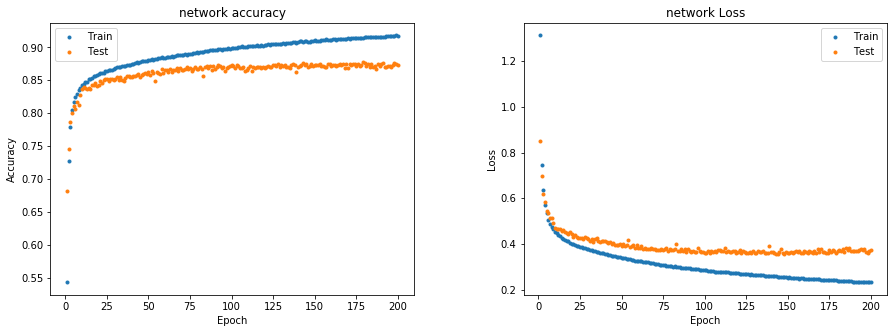

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)
fig.subplots_adjust(wspace=0.3)
axes[0][0].plot(list(range(1,201)),log['train_accuracy'],'.', label='Train')
axes[0][0].plot(list(range(1,201)), log['test_accuracy'],'.', label='Test')
axes[0][0].set_ylabel('Accuracy')
axes[0][0].set_xlabel('Epoch')
axes[0][0].set_title('network accuracy')
axes[0][0].legend()

axes[0][1].plot(list(range(1,201)),log['train_loss'],'.', label='Train')
axes[0][1].plot(list(range(1,201)),log['test_loss'],'.', label='Test')
axes[0][1].set_ylabel('Loss')
axes[0][1].set_xlabel('Epoch')
axes[0][1].set_title('network Loss')
axes[0][1].legend()


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
شکل بالا نشان می دهد که تقریبا از epoch شماره ی 25 به بعد مدل دچار overfitting شده و دیگر دقت بر روی داده ی تست یالا نمیرود و تنها داده ی آموزشی دقت بالاتری می گیرد.
</div>

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>مرحله ی چهارم: ترسیم داده های با بعد کاهش یافته</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
در این قسمت در ابتدا تابع get_layer_output در کلاس layer اضافه شد تا بتوان خروجی هر لایه را به دست آورد.سپس تابعی با همین نام در کلاس FeedForwardNN به وجود آمد که با گرفتن شماره لایه خروجی آن لایه را بر می گرداند.سپس جهت ترسیم داده ها در دو بعد شبکه ای به وجود آورده که لایه ی یکی مانده به آخر آن دارای 2 نورون باشد و در انتها خروجی این در نورون دریک نمودار به همراه رنگ های مربوط به هر کلاس نشان داده شده است.
</div>

# #4-2

In [18]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
TRAINLOADER = Dataloader(train_normalize,train_label,10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(test_normalize,test_label,10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(20,input_shape=INPUT_SHAPE,activation = LeakyRelu(), initial_weight='normal',var = 1/INPUT_SHAPE)
network.add_layer(10,activation = LeakyRelu(), initial_weight='normal',var = 1/20)
network.add_layer(2,activation = LeakyRelu(), initial_weight='normal',var = 1/10)
network.add_layer(10, initial_weight='normal',var = 1/2)
network.set_training_param(loss=CrossEntropy(),lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.2646	Average Loss: 2.0196478989566575
	Test: Average Accuracy: 0.2898362619808307	Average Loss: 1.8423816113001932
Epoch 2:
	Train: Average Accuracy: 0.37693333333333334	Average Loss: 1.6949700859293821
	Test: Average Accuracy: 0.38168929712460065	Average Loss: 1.5777456607648306
Epoch 3:
	Train: Average Accuracy: 0.4170333333333333	Average Loss: 1.4751395635713562
	Test: Average Accuracy: 0.44748402555910544	Average Loss: 1.3900676589529442
Epoch 4:
	Train: Average Accuracy: 0.48525	Average Loss: 1.2989192583188949
	Test: Average Accuracy: 0.5122803514376997	Average Loss: 1.2309823747804411
Epoch 5:
	Train: Average Accuracy: 0.6084666666666667	Average Loss: 1.1625810518115924
	Test: Average Accuracy: 0.6601437699680511	Average Loss: 1.1088118138233078
Epoch 6:
	Train: Average Accuracy: 0.671	Average Loss: 1.0519628983783496
	Test: Average Accuracy: 0.65814696485623	Average Loss: 1.0252788831972308
Epoch 7:
	Train: Average Accuracy: 0.69928333333333

# #4-3

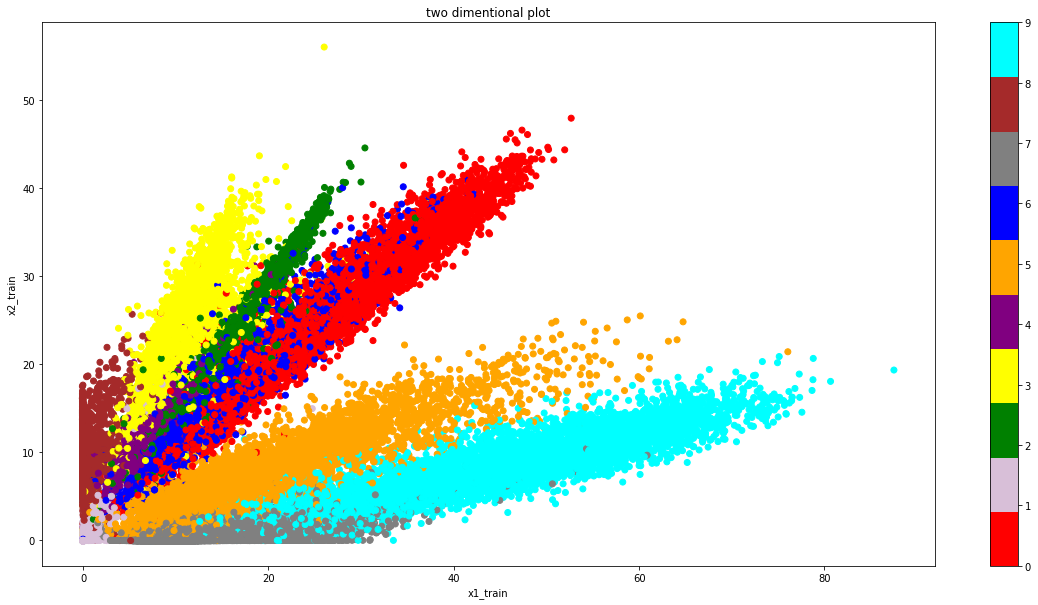

In [19]:
network.forward(train_normalize)
train_layer_out = np.array(network.get_layer_output(3))
x1_train = train_layer_out[:, 0]
x2_train = train_layer_out[:, 1]
y_train = np.array(train_label[0])
colors = ["red", "thistle", "green", "yellow", "purple", "orange","blue","grey","brown","cyan"]
fig = plt.figure(figsize=(20,10))
plt.scatter(x1_train,x2_train, c=y_train , cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("x1_train")
plt.ylabel("x2_train")
plt.title("two dimentional plot")
cb = plt.colorbar()

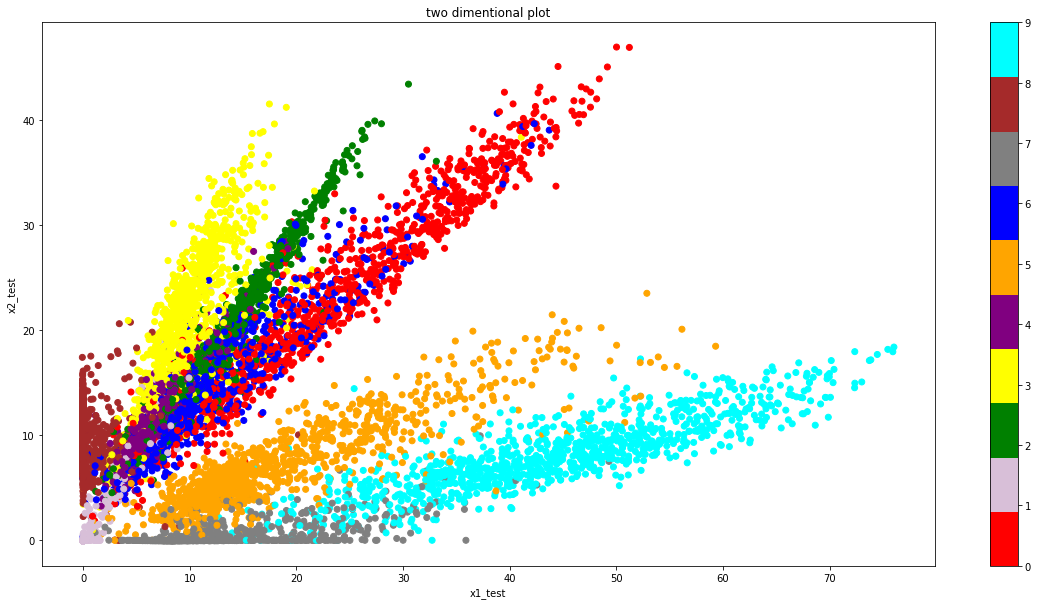

In [20]:
network.forward(test_normalize)
test_layer_out = np.array(network.get_layer_output(3))
x1_test = test_layer_out[:, 0]
x2_test = test_layer_out[:, 1]
y_test = np.array(test_label[0])
colors = ["red", "thistle", "green", "yellow", "purple", "orange","blue","grey","brown","cyan"]
fig = plt.figure(figsize=(20,10))
plt.scatter(x1_test,x2_test, c=y_test , cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("x1_test")
plt.ylabel("x2_test")
plt.title("two dimentional plot")
cb = plt.colorbar()

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;"> 
همان طور که از شکل ها پیداست در جاهایی دو رنگ کاملا از هم متمایز اند و در جاهایی همپوشانی دارند.می توان گفت مدل در جاهایی که رنگ ها متمایز ازهم اند به خوبی عمل کرده و تشخیص داده ولی در جاهایی که همپوشانی دارند به درستی صفحه را جدا نکرده.برای مثال در شکل بالا مدل در تشخیص کلاس های 7-9-5-1-3-8 خوب عمل کرده ولی در بقیه کلاس ها کمی همپوشانی وجود داشته است.
</div>